In [24]:
import numpy as np
import pandas as pd

from pandas import Series, DataFrame

In [25]:
#set seed to ensure that we can replicate the numbers generated (for random function)
np.random.seed(123)

# Series

Series is a 1-D numpy array with axis labels

In [26]:
#initialize 10 random numbers
s = Series(np.random.randn(10))

In [27]:
s

0   -1.085631
1    0.997345
2    0.282978
3   -1.506295
4   -0.578600
5    1.651437
6   -2.426679
7   -0.428913
8    1.265936
9   -0.866740
dtype: float64

## Indexing

In [28]:
# accessing the 5th element
s[4]

-0.5786002519685364

In [ ]:
# accessing multiple elements (1st, 3rd, 5th)
s[[0,2,4]]

0   -1.085631
2    0.282978
4   -0.578600
dtype: float64

In [ ]:
# using the slice notation
s[1:4]

1    0.997345
2    0.282978
3   -1.506295
dtype: float64

#### ❓Q1. Get the first 3 elements of `s`
Read the documentation on https://pandas.pydata.org/docs/reference/api/pandas.Series.html

In [ ]:
#TODO
s[0:3]

0   -1.085631
1    0.997345
2    0.282978
dtype: float64

======================================================================

## Axis label

Recall: Series is a 1-D numpy array **with axis labels**

In [ ]:
#getting the index
#Pandas data structure is extending numpy ndarray
#but it comes with index(es)
s.index

RangeIndex(start=0, stop=10, step=1)

In [ ]:
s

0   -1.085631
1    0.997345
2    0.282978
3   -1.506295
4   -0.578600
5    1.651437
6   -2.426679
7   -0.428913
8    1.265936
9   -0.866740
dtype: float64

In [ ]:
#copy a pandas data structure
s1 = s.copy()
s1.index = ["item 0", "item 1", "item 2", "item 3", "item 4", "item 5", "item 6", "item 7", "item 8", "item 9"]
s1

item 0   -1.085631
item 1    0.997345
item 2    0.282978
item 3   -1.506295
item 4   -0.578600
item 5    1.651437
item 6   -2.426679
item 7   -0.428913
item 8    1.265936
item 9   -0.866740
dtype: float64

In [ ]:
#s is untouched
#if we just use s1 = s
#s's index will be modified
s

0   -1.085631
1    0.997345
2    0.282978
3   -1.506295
4   -0.578600
5    1.651437
6   -2.426679
7   -0.428913
8    1.265936
9   -0.866740
dtype: float64

#### ❓Q2. There is a `reindex()` method. What does it do?

In [ ]:
#TODO
s2 = s1.copy()
order = ["one", "item 1", "item 2", "item 3", "item 4", "item 5", "item 6", "item 7", "item 8", "item 9"]
# s3 = s1.reindex(order)
s2 = s2.reindex(order,fill_value='okay')        
s2



# Understood ?
# New indices will be given nan
# We could also elimate the nan with desired element


one           okay
item 1    0.997345
item 2    0.282978
item 3   -1.506295
item 4     -0.5786
item 5    1.651437
item 6   -2.426679
item 7   -0.428913
item 8    1.265936
item 9    -0.86674
dtype: object

`reindex()` is different from modifying the index with different values

Instead, we define a new set of indexes and copy the values (if the index already exist previously) to the matching location, new index will be given NaN instead

In [ ]:
#instead of NaN, possible to define a default value using the fill_value argument
s11 = s1.reindex(
    ["item 0", "item A", "item 2", "item 3", "item 4", "item 5", "item 6", "item 7", "item 8", "item B"], 
    fill_value = 0)
s11

item 0   -1.085631
item A    0.000000
item 2    0.282978
item 3   -1.506295
item 4   -0.578600
item 5    1.651437
item 6   -2.426679
item 7   -0.428913
item 8    1.265936
item B    0.000000
dtype: float64

======================================================================

In [ ]:
#can still index by position
print(s1[7])

#but also possible to index by its axis label (index name)
print(s1["item 7"])


# So these series are something probably like dictionary

-0.42891262885617726
-0.42891262885617726


In [ ]:
#getting multiple items by index name
s1[["item 3", "item 6"]]

item 3   -1.506295
item 6   -2.426679
dtype: float64

#### ❓Q3. What are the different ways to get the last 3 elements of `s1`?

In [ ]:
#TODO
s1[:-3]

# Just like splicing the list 

item 0   -1.085631
item 1    0.997345
item 2    0.282978
item 3   -1.506295
item 4   -0.578600
item 5    1.651437
item 6   -2.426679
dtype: float64

======================================================================

#### ❓Q4. Suppose we do not know the size (i.e. number of elements) of `s1`, how can we find out the size programmatically?

In [ ]:
#TODO
print(len(s1))

10


======================================================================

In [ ]:
s1

item 0   -1.085631
item 1    0.997345
item 2    0.282978
item 3   -1.506295
item 4   -0.578600
item 5    1.651437
item 6   -2.426679
item 7   -0.428913
item 8    1.265936
item 9   -0.866740
dtype: float64

In [ ]:
Lis = ['hi','hello']
siL = Lis[::-1]
print(siL)

['hello', 'hi']


In [ ]:
#create a reverse of s1
s2 = Series(s.values[::-1], index=["item 0", "item 1", "item 2", "item 3", "item 4", "item 5", "item 6", "item 7", "item 8", "item 9"])
s2

# order2 = ["one", "two ", 'three', 'four','five','six','seven','eight','nine','ten']
# s3 = Series(s.values [::-1] , index = order2)      # These . value function return the reversed
# s3

item 0   -0.866740
item 1    1.265936
item 2   -0.428913
item 3   -2.426679
item 4    1.651437
item 5   -0.578600
item 6   -1.506295
item 7    0.282978
item 8    0.997345
item 9   -1.085631
dtype: float64

======================================================================

### Arithmetic operations (Series)

#### ❓Q5. What happens when we perform `s1 + s2`?

In [ ]:
#TODO
s4 = s2 + s3
# s4

# Adding two series with diffent index results in NAN :) 

s5 = s1 + s2
s5


item 0   -1.952371
item 1    2.263282
item 2   -0.145934
item 3   -3.932974
item 4    1.072836
item 5    1.072836
item 6   -3.932974
item 7   -0.145934
item 8    2.263282
item 9   -1.952371
dtype: float64

#### ❓Q12. Try other arithmetic operators...
Basically all the features we get in NumPy is available for Pandas Series/DataFrame

e.g.
https://numpy.org/doc/stable/user/basics.broadcasting.html

In [29]:
#TODO
n1 = np.broadcast(s1,s2)
print(n1)

out = np.empty(n1.shape) 
# np.shape returns the size of the array in tuple
# np.empty makes an arrya with random nums as the size from shape tuple

out.flat = [u+v for (u,v) in n1]     # Here I am adding by u + v
out

# We can add the 

array([-1.95237101,  2.26328171, -0.14593413, -3.93297396,  1.07283629,
        1.07283629, -3.93297396, -0.14593413,  2.26328171, -1.95237101])

In [ ]:
n = s2+s1
n

item 0   -1.952371
item 1    2.263282
item 2   -0.145934
item 3   -3.932974
item 4    1.072836
item 5    1.072836
item 6   -3.932974
item 7   -0.145934
item 8    2.263282
item 9   -1.952371
dtype: float64

======================================================================

In [43]:
#just be careful about mixing string indexes and integer indexes
s3 = Series(np.arange(3), index = [0, 1, 2])
print(s3)


0    0
1    1
2    2
dtype: int64


In [47]:
s4 = Series([4,5,6], index=[0, 1, 2])
print(s4)

0    4
1    5
2    6
dtype: int64


In [44]:
hi = (np.arange(3))
hi

array([0, 1, 2])

In [45]:
print(s3.index)
print(s4.index)

Int64Index([0, 1, 2], dtype='int64')
Index(['0', '1', '2'], dtype='object')


In [48]:
#get all NaN because there is no matches in the indexes
s3 + s4

0    4
1    6
2    8
dtype: int64

In [49]:
#can try to convert the indexes to int instead
s4.index = s4.index.values.astype(int)

In [50]:
s3 + s4

0    4
1    6
2    8
dtype: int64

In [61]:
s3.isnull()

0    False
1    False
2    False
dtype: bool

### Concatenation (Series)

In [51]:
#notice we are having same indexes
s5 = pd.Series(["d", "e"])
s6 = pd.Series(["f", "g"])
s7 = pd.concat([s5, s6])
s7

0    d
1    e
0    f
1    g
dtype: object

In [52]:
#got 2 values instead of 1
s7[1]

1    e
1    g
dtype: object

In [53]:
print(s7[1].values)

['e' 'g']


In [56]:
#can do auto re-indexing by setting ignore_index to True

# Concatination does not requires the values to be same
s8 = pd.concat([s5, s6], ignore_index = True)
s8

0    d
1    e
2    f
3    g
dtype: object

### Handling missing data

In [59]:
seriesWithNAs = Series([np.nan, 1, 2, 3, np.nan])
seriesWithNAs

0    NaN
1    1.0
2    2.0
3    3.0
4    NaN
dtype: float64

In [60]:
#detecting missing values using the isnull() method
seriesWithNAs.isnull()

0     True
1    False
2    False
3    False
4     True
dtype: bool

# DataFrames

DataFrame is a 2-D tabular data. The operations available for Series are also available to DataFrames (or works similarly)

In [62]:
#defining dataframe using multiple lists
df1 = DataFrame([[1,2,3,4,5], [6,7,8,9,10]], columns=["a", "b", "c", "d", "e"])
df1

,a,b,c,d,e
0,1,2,3,4,5
1,6,7,8,9,10


In [63]:
#getting the shape of dataframe
df1.shape

(2, 5)

In [64]:
#rather than specifying the rows, more common to specify the columns
#defining DF using a dictionary
df2 =  DataFrame({"Name": ["John Doe", "Jane Doe", "Jack Doe", "Bobby Blue"], "Age": [25, 26, 23, 40]})
df2

,Name,Age
0,John Doe,25
1,Jane Doe,26
2,Jack Doe,23
3,Bobby Blue,40


## Reading in data

In [69]:
gplay = pd.read_csv("googleplaystore.csv")
gplay

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


In [71]:
#remove rows containing at least one NaN value
gplay = gplay.dropna()
gplay

# gplay.dropna(inplace=True)
# gplay

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,18-Jun-17,1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,25-Jul-17,1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,6-Jul-18,1,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,19-Jan-15,Varies with device,Varies with device


## Selecting columns

In [73]:
# get the columns
print(gplay.columns)
print(len(gplay.columns))

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')
13


In [74]:
#using the column name
#this will return as a Series
print(gplay["Rating"])
print(type(gplay["Rating"]))
print(gplay["Rating"].shape)

0        4.1
1        3.9
2        4.7
3        4.5
4        4.3
        ... 
10834    4.0
10836    4.5
10837    5.0
10839    4.5
10840    4.5
Name: Rating, Length: 9361, dtype: float64
<class 'pandas.core.series.Series'>
(9361,)


In [77]:
#Tip: this will return a DataFrame with one column (on Jupyter NB is is nicely presented)
gplay[["Rating"]]

,Rating
0,4.1
1,3.9
2,4.7
3,4.5
4,4.3
...,...
10834,4.0
10836,4.5
10837,5.0
10839,4.5


#### ❓Q6. How do we get the `Rating` and `Reviews` columns for `gplay`?

In [80]:
#TODO

gplay[['Rating',"Reviews"]]


,Rating,Reviews
0,4.1,159
1,3.9,967
2,4.7,87510
3,4.5,215644
4,4.3,967
...,...,...
10834,4.0,7
10836,4.5,38
10837,5.0,4
10839,4.5,114


======================================================================

## Selecting Rows

In [85]:
#use loc and the index position
gplay.loc[0]

App               Photo Editor & Candy Camera & Grid & ScrapBook
Category                                          ART_AND_DESIGN
Rating                                                       4.1
Reviews                                                      159
Size                                                         19M
Installs                                                 10,000+
Type                                                        Free
Price                                                          0
Content Rating                                          Everyone
Genres                                              Art & Design
Last Updated                                            7-Jan-18
Current Ver                                                1.0.0
Android Ver                                         4.0.3 and up
Name: 0, dtype: object

#### ❓Q7. What are the different ways to select the first 3 rows of `gplay`?

In [89]:
#TODO
gplay.loc[0:2]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up


======================================================================

In [90]:
#also possible to use the duplicated() method 
#(which will determine whether 2 rows are duplicated by checking all the column values)
duplicated_apps = gplay.loc[gplay.duplicated()]

print(gplay.duplicated())

#print out number of rows that is duplicated 
#by default it will keep the first row as not duplicated i.e. subsequent rows with the exact same column values
#will be treated as duplicated
print(len(duplicated_apps))

#this will return all the duplicated rows
duplicated_apps

0        False
1        False
2        False
3        False
4        False
         ...  
10834    False
10836    False
10837    False
10839    False
10840    False
Length: 9361, dtype: bool
474


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,26-Feb-18,Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,31-Jul-18,Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,24-Jul-18,2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,20-Jul-18,4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business,16-Jul-18,4.3.0.508,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8643,Wunderlist: To-Do List & Tasks,PRODUCTIVITY,4.6,404610,Varies with device,"10,000,000+",Free,0,Everyone,Productivity,6-Apr-18,Varies with device,Varies with device
8654,"TickTick: To Do List with Reminder, Day Planner",PRODUCTIVITY,4.6,25370,Varies with device,"1,000,000+",Free,0,Everyone,Productivity,6-Aug-18,Varies with device,Varies with device
8658,ColorNote Notepad Notes,PRODUCTIVITY,4.6,2401017,Varies with device,"100,000,000+",Free,0,Everyone,Productivity,27-Jun-18,Varies with device,Varies with device
10049,Airway Ex - Intubate. Anesthetize. Train.,MEDICAL,4.3,123,86M,"10,000+",Free,0,Everyone,Medical,1-Jun-18,0.6.88,5.0 and up


In [91]:
#to get the first row in duplicated_apps, this will not work 
#duplicated_apps.loc[0]

#instead we need to use iloc
first_dup_app = duplicated_apps.iloc[:1]
first_dup_app

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,26-Feb-18,Varies with device,4.0.3 and up


In [92]:
print(type(first_dup_app["App"])) #take note that this is a Series so we should get the value of it for comparison
first_dup_app_name = first_dup_app["App"].values[0]
print(type(first_dup_app_name))
gplay.loc[gplay["App"] == first_dup_app_name]

<class 'pandas.core.series.Series'>
<class 'str'>


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
222,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,26-Feb-18,Varies with device,4.0.3 and up
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,26-Feb-18,Varies with device,4.0.3 and up
285,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80804,Varies with device,"5,000,000+",Free,0,Everyone,Business,26-Feb-18,Varies with device,4.0.3 and up


In [93]:
#actually without .loc[] it will work just fine too
#just make sure that we have equal length 
#(i.e. the number of boolean values matches the number of rows of dataframe)
gplay[gplay["App"] == first_dup_app_name]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
222,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,26-Feb-18,Varies with device,4.0.3 and up
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,26-Feb-18,Varies with device,4.0.3 and up
285,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80804,Varies with device,"5,000,000+",Free,0,Everyone,Business,26-Feb-18,Varies with device,4.0.3 and up


In [94]:
#like Series, we can use the drop_duplicates() to remove the duplicated rows
print(gplay.shape)
print(gplay.drop_duplicates().shape)

(9361, 13)
(8887, 13)


## Index of DataFrame

In [95]:
#possible to make one of the column the index
gplay1 = gplay.set_index("App")

#alternatively, when loading, it's possible to select the index column
#gplay = pd.read_csv("googleplaystore.csv", index_col="App")
gplay1

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
App,,,,,,,,,,,,
Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
"U Launcher Lite – FREE Live Cool Themes, Hide Apps",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...
FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,18-Jun-17,1.0.0,4.1 and up
Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,25-Jul-17,1.48,4.1 and up
Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,6-Jul-18,1,4.1 and up


In [97]:
#getting a row by its index name (using .loc())
#again duplicates can happen (i.e. having index with the same name)
gplay1.loc["Coloring book moana"]

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
App,,,,,,,,,,,,
Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
Coloring book moana,FAMILY,3.9,974,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up


# Exploratory Data Analysis

## Descriptive Statistics

In [96]:
#can use info method to get more information on the DF
#which includes the datatype, etc
gplay.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9361 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9361 non-null   object 
 1   Category        9361 non-null   object 
 2   Rating          9361 non-null   float64
 3   Reviews         9361 non-null   int64  
 4   Size            9361 non-null   object 
 5   Installs        9361 non-null   object 
 6   Type            9361 non-null   object 
 7   Price           9361 non-null   object 
 8   Content Rating  9361 non-null   object 
 9   Genres          9361 non-null   object 
 10  Last Updated    9361 non-null   object 
 11  Current Ver     9361 non-null   object 
 12  Android Ver     9361 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.3+ MB


In [98]:
#this will generate the descriptive statistics for the numeric attributes (by default)
gplay.describe()

,Rating,Reviews
count,9361.000000,9.361000e+03
mean,4.191593,5.143218e+05
std,0.515780,3.144860e+06
min,1.000000,1.000000e+00
25%,4.000000,1.860000e+02
50%,4.300000,5.950000e+03
75%,4.500000,8.161400e+04
max,5.000000,7.815831e+07


In [99]:
#can specify the include="all" to include all columns
gplay.describe(include="all")

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,9361,9361,9361.000000,9.361000e+03,9361,9361,9361,9361,9361,9361,9361,9361,9361
unique,8191,33,NaN,NaN,413,19,2,73,6,115,1299,2594,31
top,ROBLOX,FAMILY,NaN,NaN,Varies with device,"1,000,000+",Free,0,Everyone,Tools,3-Aug-18,Varies with device,4.1 and up
freq,9,1746,NaN,NaN,1637,1576,8716,8716,7415,732,319,1415,2059
mean,NaN,NaN,4.191593,5.143218e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.515780,3.144860e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,1.860000e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,5.950000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,8.161400e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Filtering & Visualization

In [100]:
#for category fields, probably better to use value_counts()
gplay["Category"].value_counts()

#alternatively
#gplay.Category.value_counts()

FAMILY                 1746
GAME                   1097
TOOLS                   733
PRODUCTIVITY            351
MEDICAL                 350
COMMUNICATION           328
FINANCE                 323
SPORTS                  319
PHOTOGRAPHY             317
LIFESTYLE               315
PERSONALIZATION         312
BUSINESS                303
HEALTH_AND_FITNESS      297
SOCIAL                  259
SHOPPING                238
NEWS_AND_MAGAZINES      233
TRAVEL_AND_LOCAL        226
DATING                  195
BOOKS_AND_REFERENCE     178
VIDEO_PLAYERS           160
EDUCATION               155
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     124
FOOD_AND_DRINK          109
HOUSE_AND_HOME           76
WEATHER                  75
AUTO_AND_VEHICLES        73
LIBRARIES_AND_DEMO       64
ART_AND_DESIGN           61
COMICS                   58
PARENTING                50
EVENTS                   45
BEAUTY                   42
Name: Category, dtype: int64

In [103]:
gplay

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,18-Jun-17,1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,25-Jul-17,1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,6-Jul-18,1,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,19-Jan-15,Varies with device,Varies with device


In [102]:
gplay['App'].value_counts()

ROBLOX                                               9
CBS Sports App - Scores, News, Stats & Watch Live    8
ESPN                                                 7
Duolingo: Learn Languages Free                       7
8 Ball Pool                                          7
                                                    ..
Math Games for Pre-K - Grade 4                       1
Radio K - KUOM                                       1
Kpop Music Quiz (K-pop Game)                         1
OST)                                                 1
iHoroscope - 2018 Daily Horoscope & Astrology        1
Name: App, Length: 8191, dtype: int64

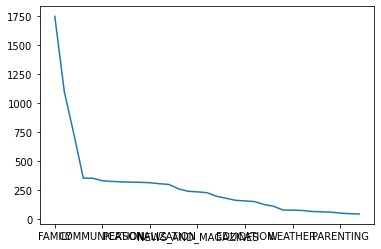

In [104]:
#default plot is a line chart
gplay["Category"].value_counts().plot()

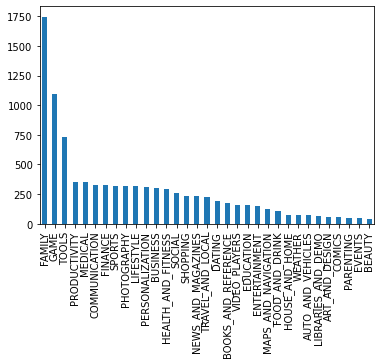

In [105]:
#we should use a bar chart
gplay["Category"].value_counts().plot.bar()

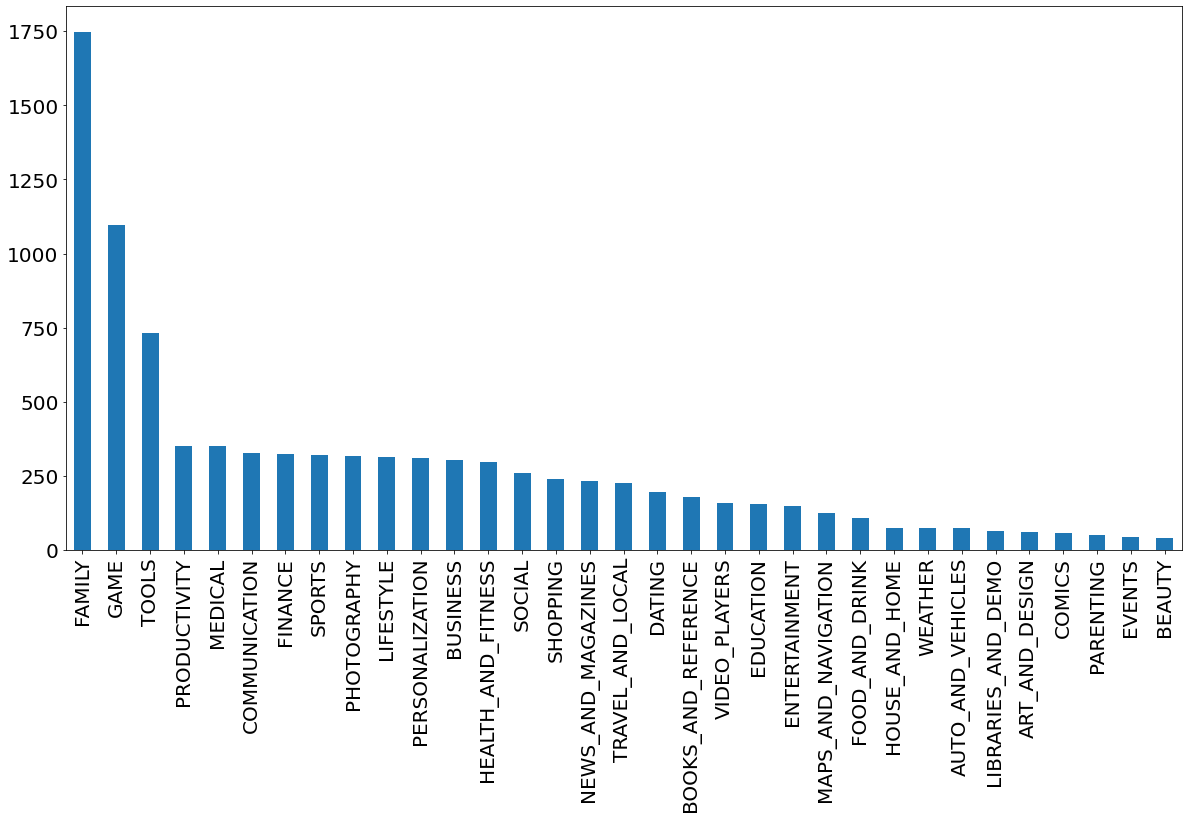

In [106]:
#make the chart bigger using the figsize and fontsize argument (uses matplotlib under the hood)
gplay["Category"].value_counts().plot(kind="bar", figsize=(20,10), fontsize=20)

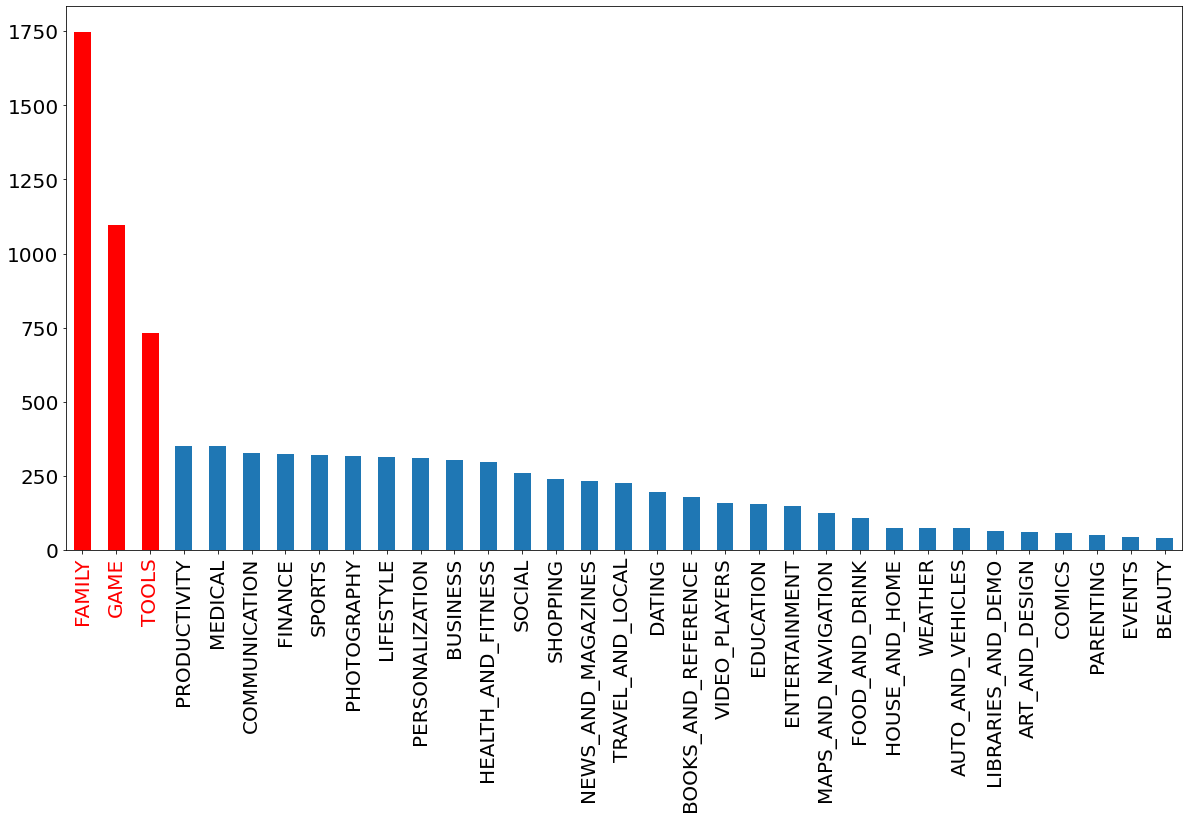

In [108]:
#can customize chart more to better illustrate the above insights

#generate an array of colors (make all as blue)
colors = ["#1f77b4"] * len(set(gplay["Category"].values))

#set the first 3 color as red ("r")
colors[:3] = "r" * 3

#set the color of the first 3 bars as red
category_plot = gplay["Category"].value_counts().plot(kind="bar", figsize=(20,10), fontsize=20, color=colors)

#set the color of the first 3 x-labels as red
for i in range(3):
    category_plot.get_xticklabels()[i].set_color("r")

#### ❓Q8. Obtain the filtered dataset with just apps from the top `n` categories and assign it to a variable `top_n_cat_list`. How many rows are there in `top_n_cat_list`?

In [119]:
n = 3

top_n_cat_list = (gplay['App'].iloc[0:n])
print(top_n_cat_list)
print(len(top_n_cat_list))
#TODO


0       Photo Editor & Candy Camera & Grid & ScrapBook
1                                  Coloring book moana
2    U Launcher Lite – FREE Live Cool Themes, Hide ...
Name: App, dtype: object
3


#### ❓Q9. What is the distribution of the ratings of the apps in  `top_n_cat_list`? Use appropriate numerical measures and visualization

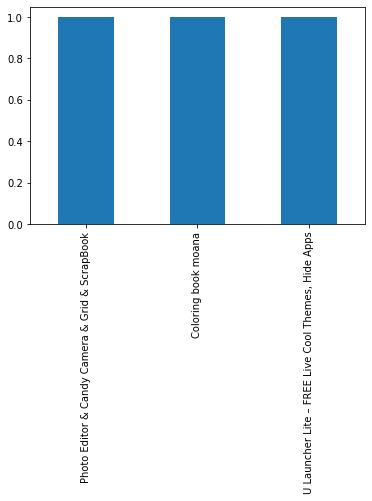

In [125]:
#TODO
top_n_cat_list.value_counts().plot.bar()

#### ❓Q10. How does the distribution (of the rating) in Q3 compare with the distribution for the entire dataset?

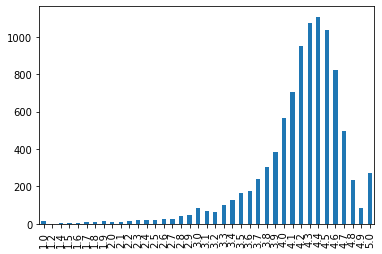

In [129]:
#TODO
gplay['Rating'].value_counts().sort_index().plot.bar()

In [127]:
gplay

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,18-Jun-17,1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,25-Jul-17,1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,6-Jul-18,1,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,19-Jan-15,Varies with device,Varies with device


#### ❓Q11. Considering the entire dataset (`gplay`), what can we say about the average rating for each of the category by generating relevant visualizations? What insights can be said about the average rating for each category?

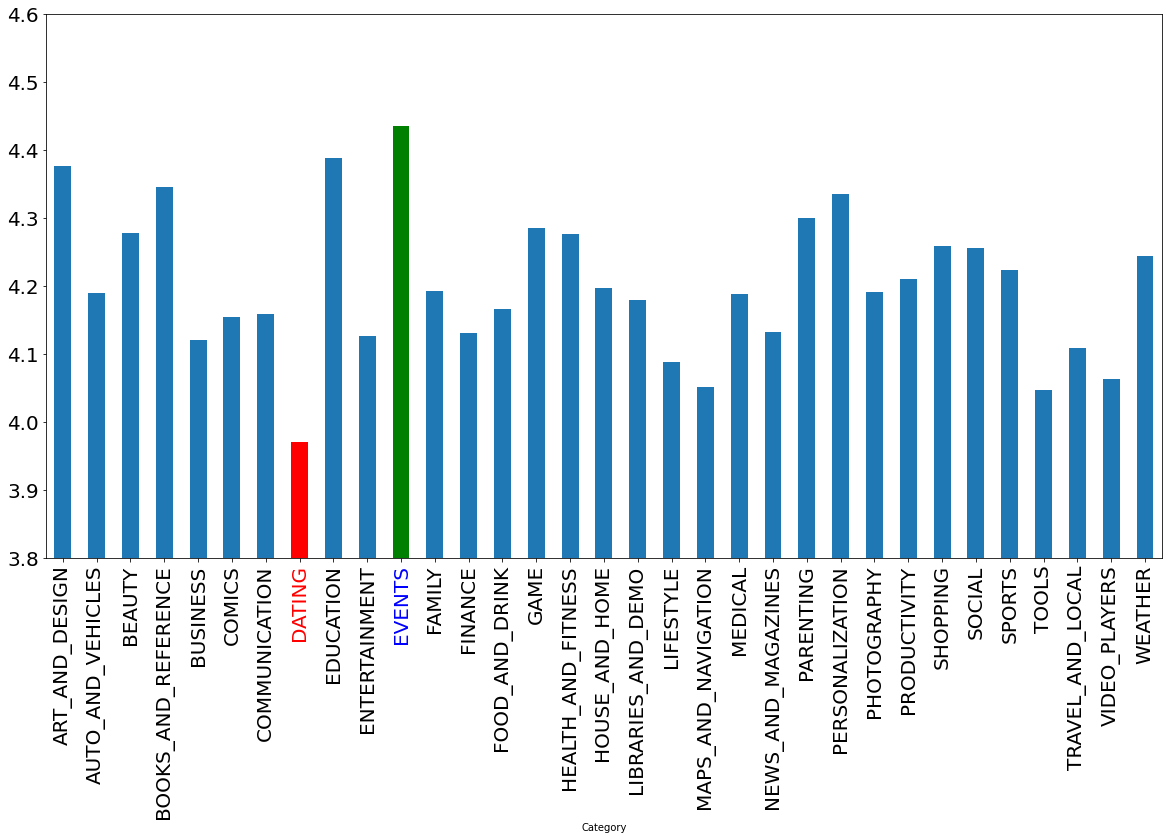

In [130]:
colors = ["#1f77b4"] * len(set(gplay["Category"].values))
colors[7] = "r"
colors[10] = "g" #green

cat_avg_rating_plot = gplay.groupby("Category").mean()["Rating"].plot(kind = "bar", figsize=(20,10), fontsize=20
                                                                      , color=colors)
cat_avg_rating_plot.set_ylim(3.8,4.6)

cat_avg_rating_plot.get_xticklabels()[7].set_color("r")

cat_avg_rating_plot.get_xticklabels()[10].set_color("b")